# <span style='color:Blue'> Final Project: Analyzing Fake & Real News </span>

Dataset - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

<img src = "fake vs real_1.png" style = "width:1000px">

### Class: STA 9665, Natural Language Processing
Fall, 2020

### Team Members:
Group: Team 8
1. Danny Huang
2. Nicole Ly
3. Nishtha Ram
4. Qinyi Li
5. Tanay Mukherjee
6. Trang Le
7. Xinyi Li

### Submission to:
Prof. Chaoqun Deng

----

## All packages and libraries

In [1]:
# For installing any libraries
'''
!pip install <package-name>
'''

'\n!pip install <library>\n'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

In [4]:
import nltk
import re
from wordcloud import WordCloud

# <span style='color:Blue'> Part A: Exploratory Data Analysis </span>

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

### 1. This dataset contains a list of articles considered as "fake" news

In [5]:
# Load the fake news dataset
df_fake = pd.read_csv('Fake.csv')

In [6]:
# File info
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
# To print top 5 records form the file
df_fake.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [8]:
# Records - rows and columns
df_fake.shape

(23481, 4)

In [9]:
# Summarize the data for each feature
df_fake.describe(include='all')

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [10]:
# Check for total null values
df_fake.isnull().values.sum()

0

Target looks like classification


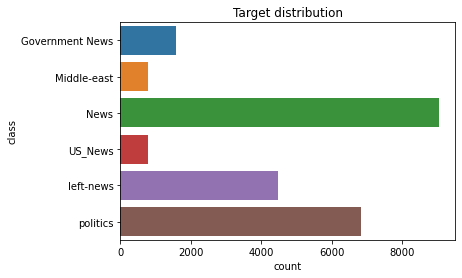

In [11]:
# Distribution of fake news text across different news vertical
dabl.plot(df_fake, target_col="text")

In [12]:
# Counting by Subjects 
for key,count in df_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Getting Total Rows
print(f"Total Records:\t{df_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


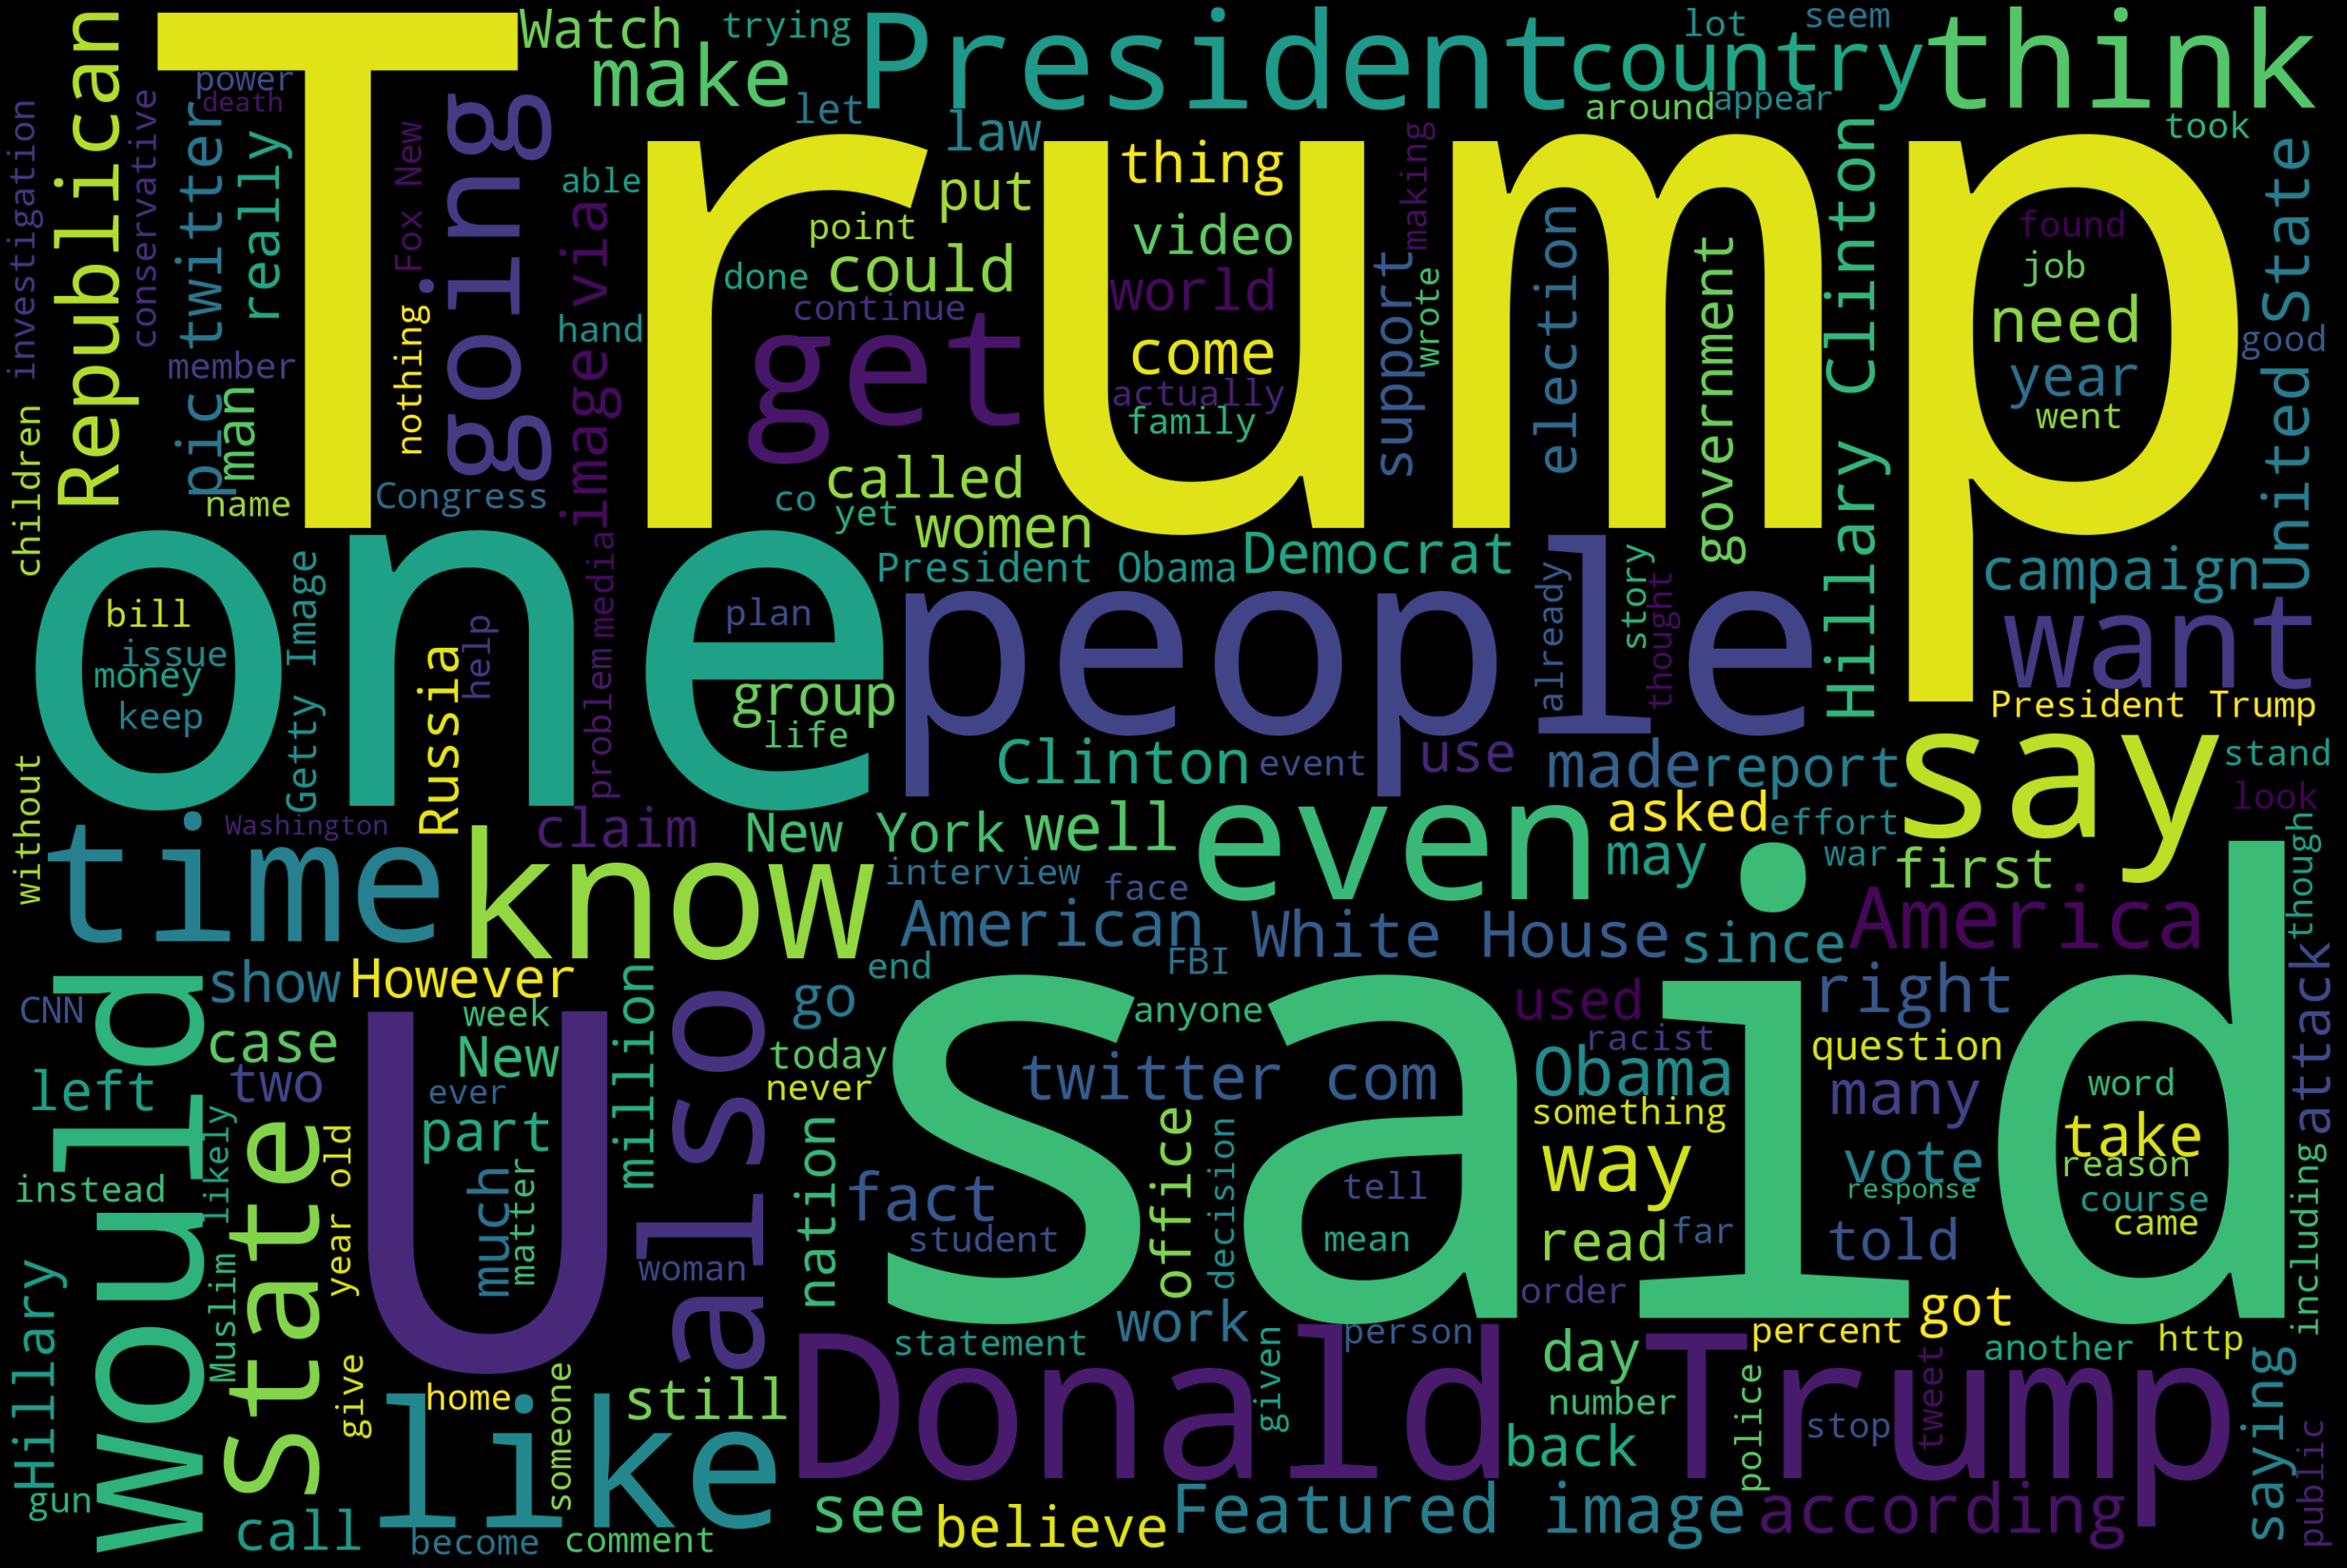

In [16]:
# Word Cloud for fake news dataset
text = ''
for news in df_fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

### 2. This dataset contains a list of articles considered as "real" news

In [13]:
# Load the real news dataset
df_real = pd.read_csv('True.csv')

In [14]:
# File info
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [15]:
# To print top 5 records form the file
df_real.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [16]:
# Records - rows and columns
df_real.shape

(21417, 4)

In [17]:
# Summarize the data for each feature
df_real.describe(include='all')

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182

In [18]:
# Check for total null values
df_real.isnull().values.sum()

0

Target looks like classification


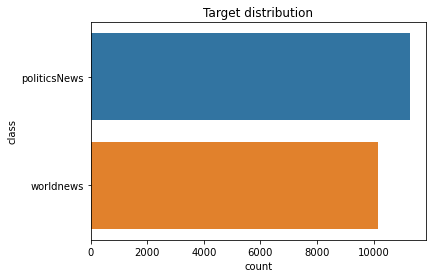

In [19]:
# Distribution of real news text across different news vertical
dabl.plot(df_real, target_col="text")

In [20]:
# Counting by Subjects 
for key,count in df_real.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Getting Total Rows
print(f"Total Records:\t{df_real.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


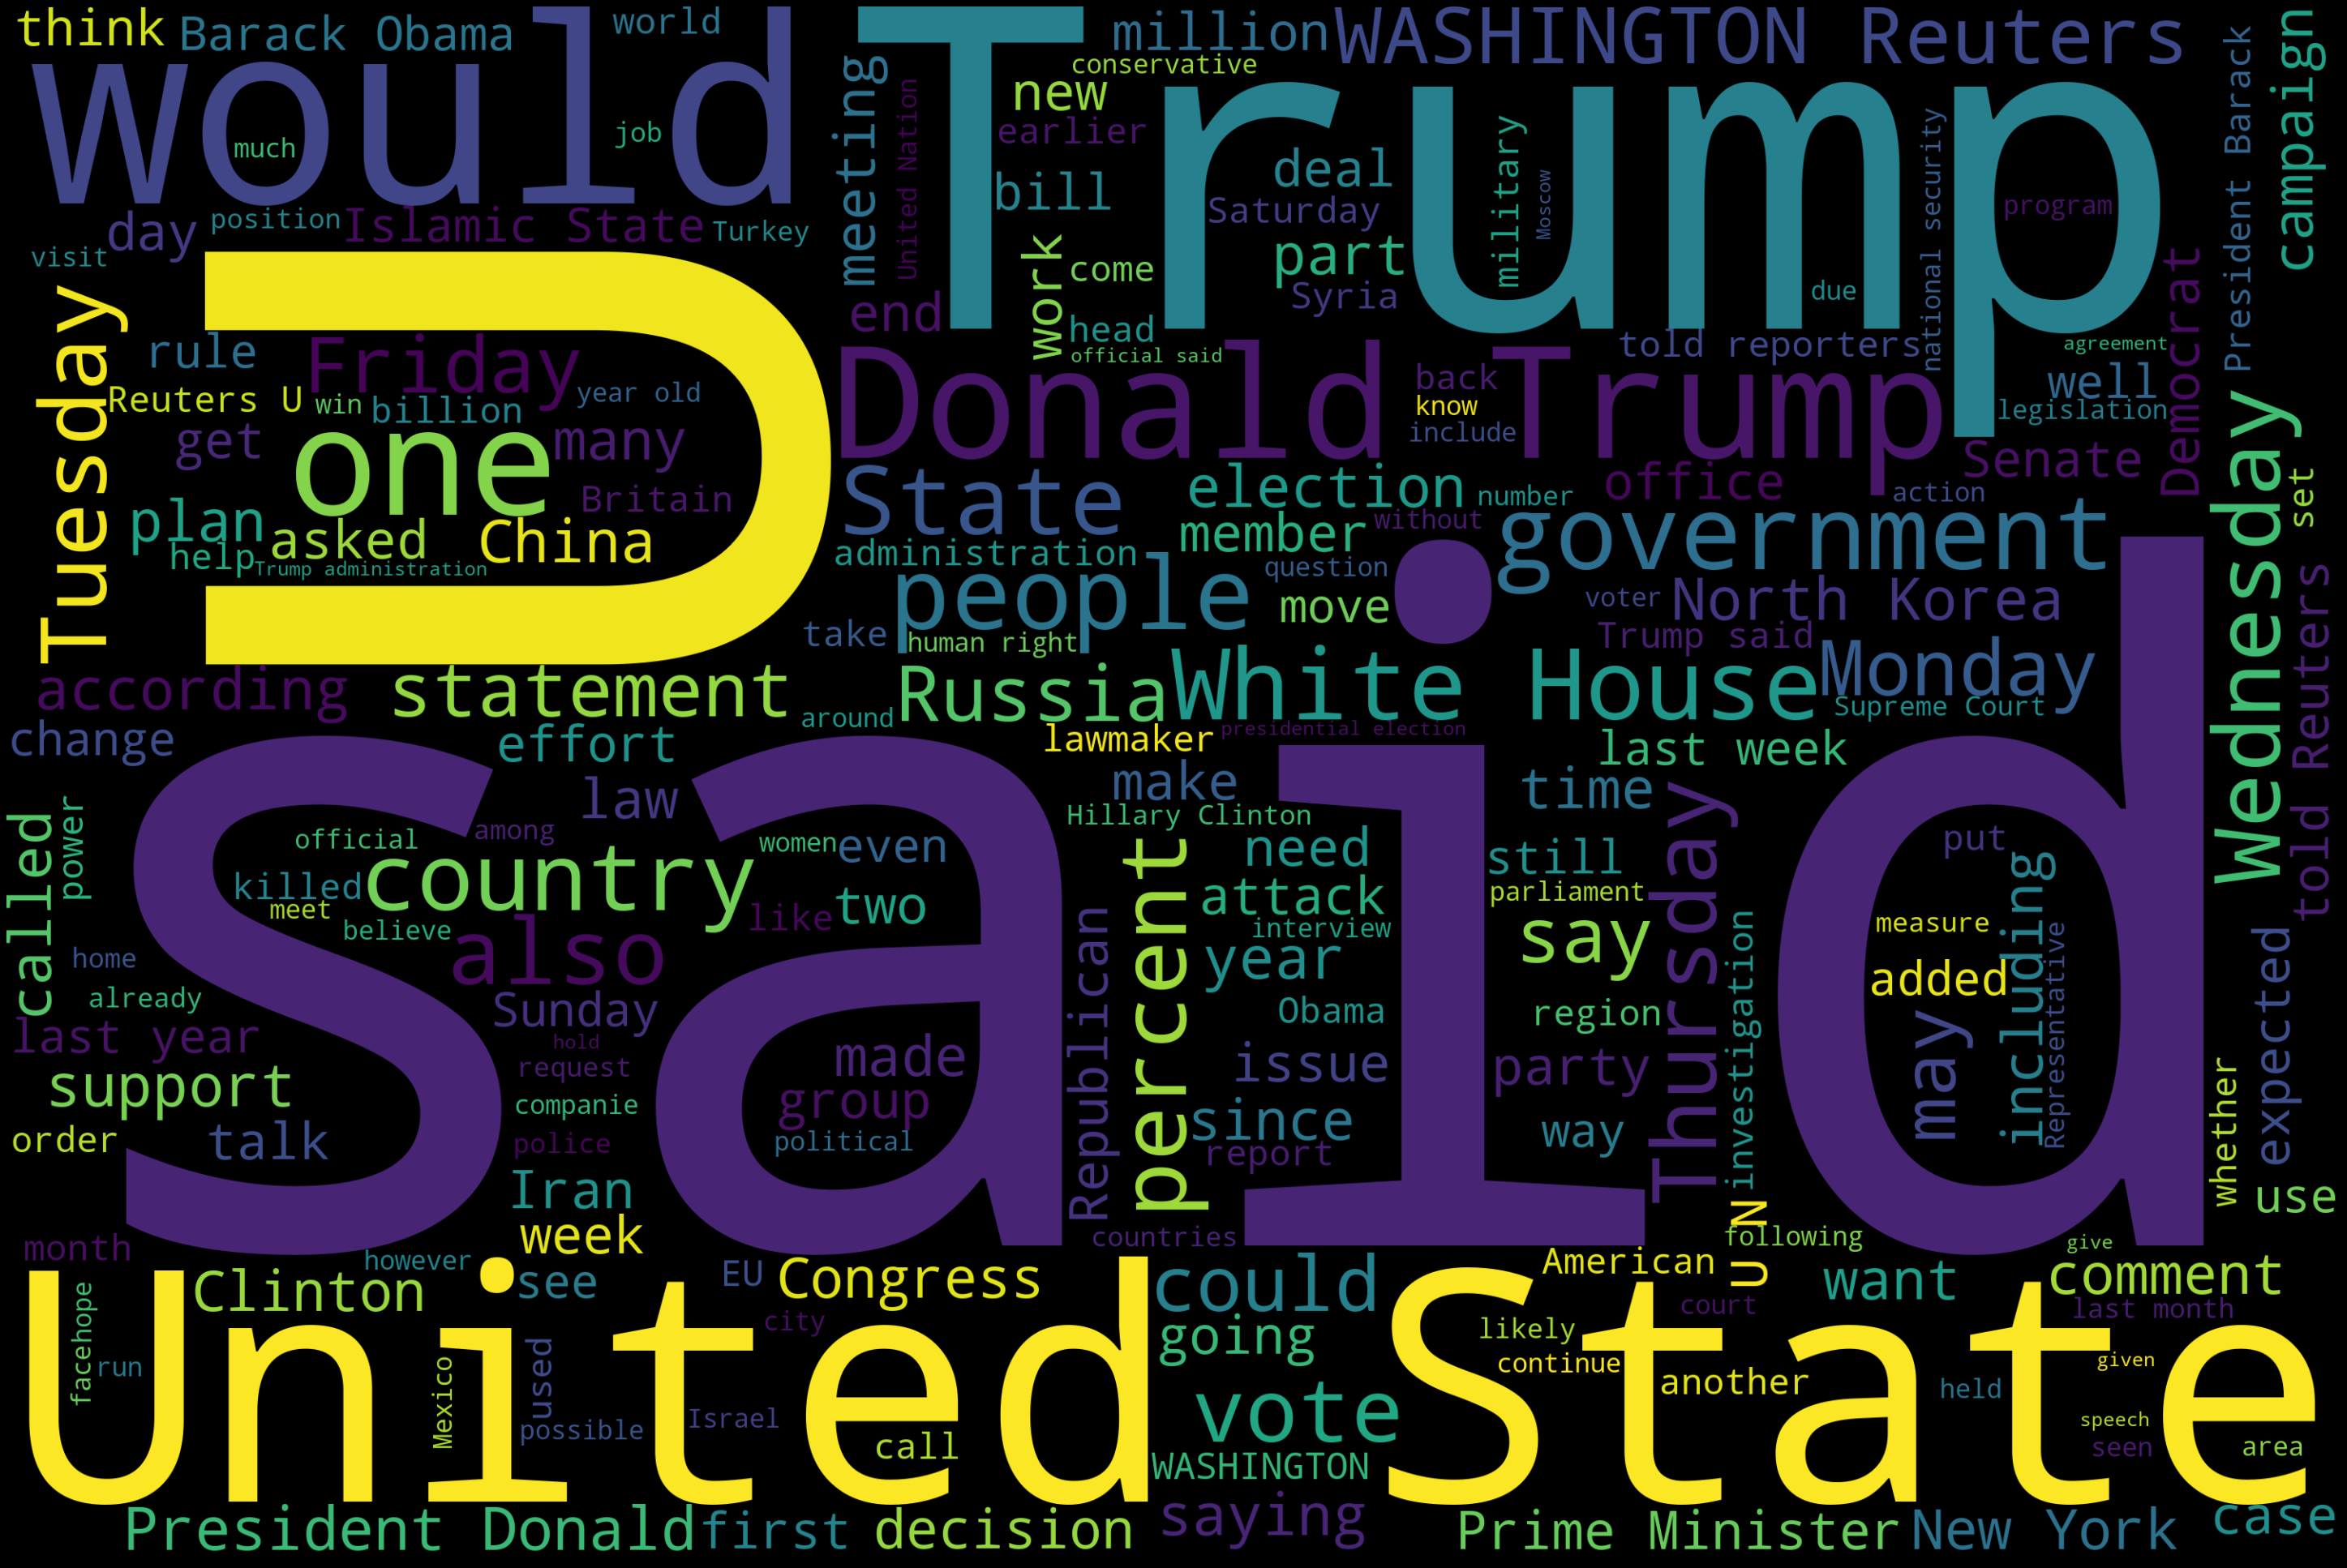

In [31]:
# Word Cloud for real news dataset
text = ''
for news in df_real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# <span style='color:Blue'> Part B: Data pre-processing </span>

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, lacking in certain behaviors or trends, and is likely to contain many errors.

Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\its_t\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [23]:
# Target variable for fake news
df_fake['tag']=0

# Target variable for real news
df_real['tag']=1

In [24]:
# Merging both the datasets as one
data = pd.DataFrame()
data = df_real.append(df_fake)

In [25]:
data.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  tag  
0  December 31, 2017     1  
1  December 29, 2017     1  
2  December 31, 2017     1  
3  December 30, 2017     1  
4  December 29, 2017     1

In [26]:
data.tail(5)

title  \
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  tag  
23476  January 16, 2016    0  
23477  January 16, 2016    0  
23478  January 15, 2016    0  
23479  January 14, 2016    0  
23480  January 12, 2016    0

In [27]:
# Checking how does the date feature appear in the given dataset
data['date'].value_counts()

December 20, 2017                                                                                                           182
December 6, 2017                                                                                                            166
November 30, 2017                                                                                                           162
November 9, 2017                                                                                                            158
October 13, 2017                                                                                                            155
                                                                                                                           ... 
MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]      1
December 4, 2017                                                                                        

In [28]:
# Removing links and the headline from the date column
data=data[~data.date.str.contains("http")]
data=data[~data.date.str.contains("HOST")]

In [29]:
# Converting the date to datetime format
data['date'] = pd.to_datetime(data['date'])
data['date'] = pd.to_datetime(data['date'])

In [30]:
data.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   tag  
0    1  
1    1  
2    1  
3    1  
4    1

In [31]:
# Create a copy of the original data for future use without having to re-do the cleaning process again and again
clean_data = data.copy()

In [32]:
# Function to put together the whole cleaning process together
def cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [33]:
# Cleaning data using the above mentioned function
clean_data['text']=clean_data['text'].apply(lambda x: cleaning(x))

In [34]:
# Removing stop words
stop = stopwords.words('english')
clean_data['text'] = clean_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [35]:
clean_data.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  washington (reuters) - head conservative repub...  politicsNews 2017-12-31   
1  washington (reuters) - transgender people allo...  politicsNews 2017-12-29   
2  washington (reuters) - special counsel investi...  politicsNews 2017-12-31   
3  washington (reuters) - trump campaign adviser ...  politicsNews 2017-12-30   
4  seattle/washington (reuters) - president donal...  politicsNews 2017-12-29   

   tag  
0    1  
1    1  
2    1  
3    1  
4    1

# <span style='color:Blue'> Part C: Data Summary </span>

We try to summarize our data files here by looking at the spread of both fake and real news across all the available time period, then check the NERs and do n-gram analysis to find what is appearing the most relevant or common info from the news articles.

## 1. Distribution of fake and real news by timelines

In [36]:
# Seperate fake and real data analysis
fake = clean_data[clean_data['tag']==0]
real = clean_data[clean_data['tag']==1]

In [37]:
import plotly.graph_objs as go

In [ ]:
# Creating the count of output based on date and plot an interactive chart for the timeline of fake and real news
fake=fake.groupby(['date'])['tag'].count()
fake=pd.DataFrame(fake)

real=real.groupby(['date'])['tag'].count()
real=pd.DataFrame(real)

#Plotting the time series graph
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=real.index,
         y=real['tag'],
         name='Real',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=fake.index,
         y=fake['tag'],
         name='Fake',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='Real and Fake News',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

The above timeline graph is interactive plot using plotly package and it disappears as we shutdown the kernel and hence below is the plaecholder image to depict the output. The same can be achieved on running the above cells of code in sequence.

<img src = "news_timeline.jpg" style = "width:1000px">

## 2. NER - Named Entity Recognition

Named entity recognition (NER)is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

In [39]:
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
%matplotlib inline

In [40]:
# First 100 news articles and from real datatset
ner_data_real = data.head(100)

In [41]:
# First 100 news articles and from fake datatset
ner_data_fake = data.tail(100)

In [42]:
# Get the tokens
tokens_real = nlp(''.join(str(ner_data_real.text.tolist())))
tokens_fake = nlp(''.join(str(ner_data_fake.text.tolist())))

In [43]:
# Extract Persons from top 10 real news
person_list = []
for ent in tokens_real.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])
df_person.head(10)

text  count
0     Donald Trump     81
1            Trump     34
2          Mueller     17
3        McConnell     17
4        Kuczynski     16
5            Moore     11
6          Clinton     11
7     Barack Obama     10
8  Hillary Clinton     10
9   Robert Mueller      8

In [44]:
# Extract Persons from top 10 fake news
person_list = []
for ent in tokens_fake.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])
df_person.head(10)

text  count
0        Donald Trump     45
1             Finicum     39
2                Cruz     37
3             Clinton     29
4     Hillary Clinton     27
5             Hillary     25
6                Bush     24
7  Patrick Henningsen     23
8         Marco Rubio     22
9              Scalia     21

In [45]:
# Extract Locations from top 10 real news
loc_list = []
for ent in tokens_real.ents:
    if ent.label_ == 'GPE':
        loc_list.append(ent.text)
        
loc_counts = Counter(loc_list).most_common(20)
df_loc = pd.DataFrame(loc_counts, columns =['text', 'count'])
df_loc.head(10)

text  count
0               U.S.    162
1         WASHINGTON     60
2  the United States     42
3             Russia     27
4         Washington     26
5        Puerto Rico     26
6           Virginia     21
7         California     18
8           New York     18
9            Alabama     15

In [46]:
# Extract Locations from top 10 fake news
loc_list = []
for ent in tokens_fake.ents:
    if ent.label_ == 'GPE':
        loc_list.append(ent.text)
        
loc_counts = Counter(loc_list).most_common(20)
df_loc = pd.DataFrame(loc_counts, columns =['text', 'count'])
df_loc.head(10)

text  count
0       Syria    156
1          US    110
2  Washington     56
3      Turkey     47
4      Oregon     43
5        Iraq     43
6        U.S.     41
7      Russia     39
8     America     37
9      Israel     29

In [47]:
# Extract Events from top 10 real news
ev_list = []
for ent in tokens_real.ents:
    if ent.label_ == 'EVENT':
        ev_list.append(ent.text)
        
ev_counts = Counter(ev_list).most_common(20)
df_ev = pd.DataFrame(ev_counts, columns =['text', 'count'])
df_ev.head(10)

text  count
0           Hurricane Maria      3
1      the COLDEST New Year      1
2  the June 9, 2016 meeting      1
3                  New Year      1
4           the Vietnam War      1
5              the Iraq war      1
6       the Great Recession      1

In [48]:
# Extract Events from top 10 fake news
ev_list = []
for ent in tokens_fake.ents:
    if ent.label_ == 'EVENT':
        ev_list.append(ent.text)
        
ev_counts = Counter(ev_list).most_common(20)
df_ev = pd.DataFrame(ev_counts, columns =['text', 'count'])
df_ev.head(10)

text  count
0                     the War on      2
1                   THE FOLLOING      2
2                   the Cold War      1
3                   World War II      1
4                 the Korean War      1
5  Century Wire Financial Files'      1
6           the Geneva III talks      1
7                 the Geneva III      1
8                  Super Tuesday      1
9                The Sunday Wire      1

## 3. N-gram Analysis

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

In [49]:
# Convert all the text from the news article into strings
string = ' '.join(clean_data['text'])
str_val = string.split(" ")

<AxesSubplot:xlabel='value', ylabel='key'>

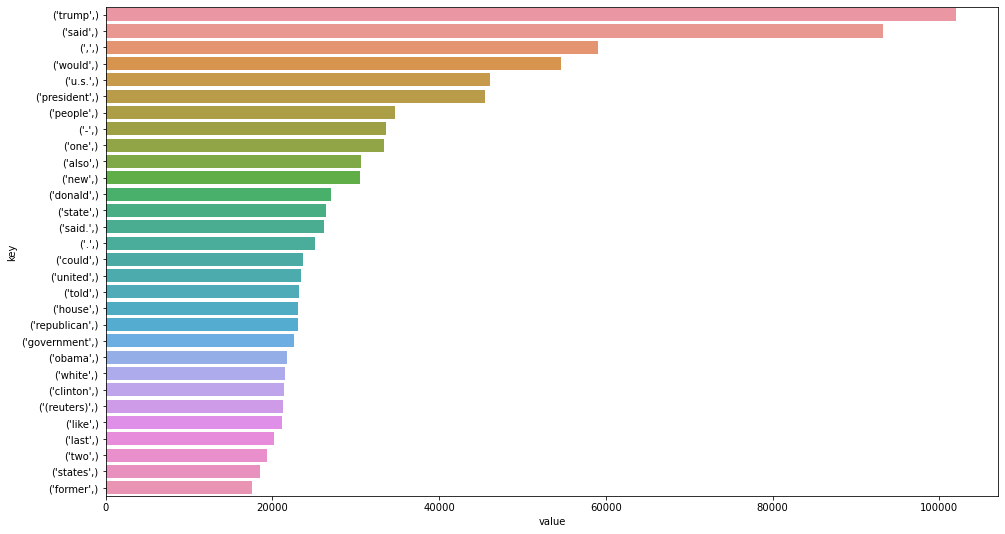

In [50]:
# Unigram analysis
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

<AxesSubplot:xlabel='value', ylabel='key'>

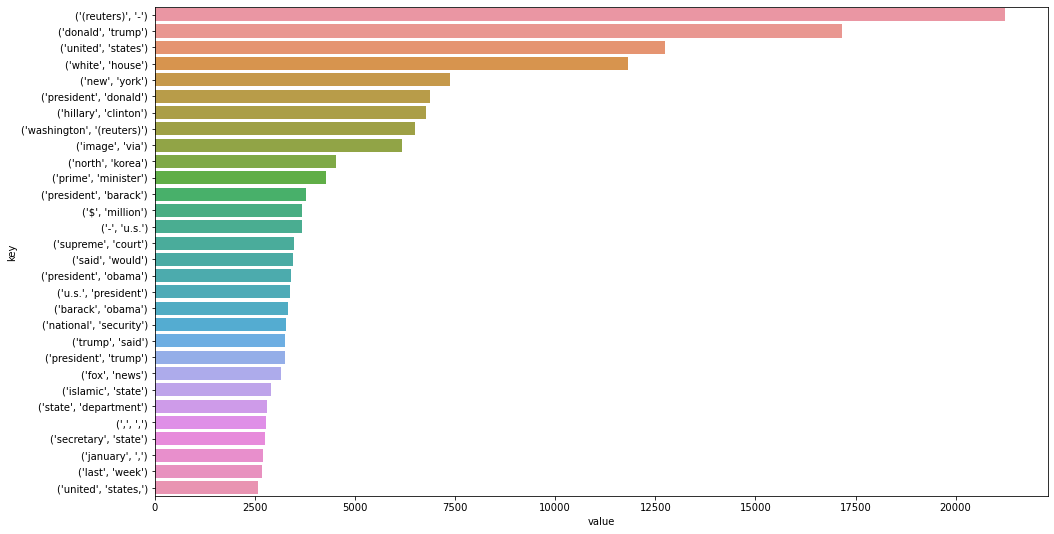

In [51]:
# Bigram analysis
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})

plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)

<AxesSubplot:xlabel='value', ylabel='key'>

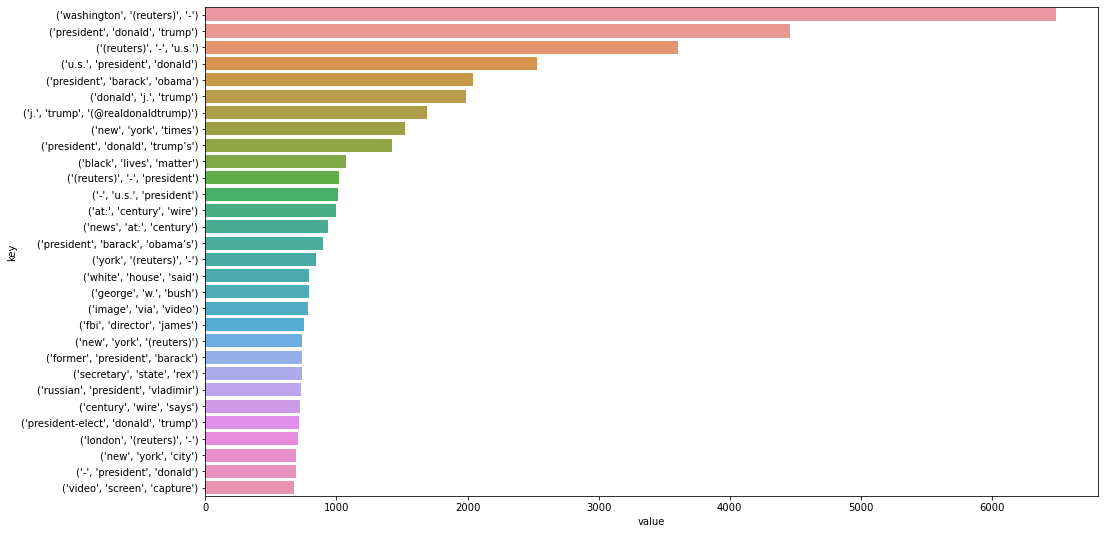

In [52]:
# Trigram analysis
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})

plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)

# <span style='color:Blue'> Part D: Understanding Feature Extraction </span>

Feature extraction involves reducing the number of resources required to describe a large set of data. When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause a classification algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy.

**NOTE:** This is to just understand how feature engineering is done to extract info from the dataset to find items/tags/variables that will help us classify the news articles. However, later in **Part F** we will use TF-IDF in pipeline with count vectorization for feature extraction which is a more advanced way to extract important features from text files and assign relevant weights to it.

In [53]:
# Create a copy to showcase how a feature is generated, though later we will use count vectorization & TF-IDF
data_features = data.copy()

In [54]:
# First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(data_features.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        record[1]
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [55]:
# Seperating Publication info, from actual text
publisher = []
tmp = []
for index,row in enumerate(data_features.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp.append(row)
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp.append(record[1])

In [56]:
data_features["publisher"] = publisher
data_features["text"] = tmp
data_features.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0   The head of a conservative Republican faction...  politicsNews 2017-12-31   
1   Transgender people will be allowed for the fi...  politicsNews 2017-12-29   
2   The special counsel investigation of links be...  politicsNews 2017-12-31   
3   Trump campaign adviser George Papadopoulos to...  politicsNews 2017-12-30   
4   President Donald Trump called on the U.S. Pos...  politicsNews 2017-12-29   

   tag                     publisher  
0    1          WASHINGTON (Reuters)  
1    1          WASHINGTON (Reuters)  
2    1          WASHINGTON (Reuters)  
3    1          WASHINGTON (Reuters)  
4    1  SEATTLE/WASHINGTON (Reuters)

In [57]:
# Function to count all the uppercase letters
def uppercase(x):
    uppercase_list = []
    for word in x.split():
        if word.isupper():
            uppercase_list.append(word)
    return len(uppercase_list)

In [58]:
# Function to count all the lowercase letters
def lowercase(x):
    lowercase_list = []
    for word in x.split():
        if word.islower():
            lowercase_list.append(word)
    return len(lowercase_list)

In [59]:
# Function to get the average word length
def avg_word_length(x):
    words = x.split()
    if len(words) == 0:
        return 0
    else:
        return (sum(len(word) for word in words ) / len(words))

In [60]:
# Function to count all the punctuations
def num_punctuation(x):
  _, count = re.subn(r'\W', '', x)
  return count

In [61]:
# How many publishers are there curating all these news articles (both fake and real)?
data_features['publisher'].value_counts()

Unknown                            23435
WASHINGTON (Reuters)                6389
(Reuters)                           1483
LONDON (Reuters)                     705
NEW YORK (Reuters)                   695
                                   ...  
SANDY SPRINGS, Ga. (Reuters)           1
NEWTOWN, Pa./NEW YORK (Reuters)        1
NEW DELHI/TOKYO (Reuters)              1
DONETSK, Ukraine (Reuters)             1
SEVASTOPOL, Crimea (Reuters)           1
Name: publisher, Length: 1730, dtype: int64

In [62]:
# Frequency distribution to convert publishers into numeric feature
unique_publishers = data_features['publisher'].drop_duplicates().values.tolist()
unique_publishers.sort()

# Put count of each value of publication in a list
unique_publishers_values = data_features['publisher'].value_counts().sort_index().tolist()

# Calculating frequency distribution
unique_publishers_values = [x / sum(unique_publishers_values) for x in unique_publishers_values]
publisher_dict = dict(zip(unique_publishers, unique_publishers_values))

In [63]:
# Use the raw dataset we created earlier by appending fake and real datasets, and using it to generate more features
data_features['word_count'] = data_features['text'].apply(lambda x : len(str(x).split(" ")))
data_features['total_uppercase_letters'] = data_features['text'].apply(lambda x : uppercase(x))
data_features['total_lowercase_letters'] = data_features['text'].apply(lambda x : lowercase(x))
data_features['punc_count'] = data_features['text'].apply(lambda x : num_punctuation(x))
data_features['avg_word_length'] = data_features['text'].apply(lambda x : avg_word_length(x))
data_features['publisher_weight'] = data_features['publisher'].map(publisher_dict)

In [64]:
# Cleaning the data again using the same steps used in pre-processing again here after the features were extracted above
data_features['text'] = data_features['text'].apply(lambda x: cleaning(x))
data_features['text'] = data_features['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [65]:
data_features.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  head conservative republican faction u.s. cong...  politicsNews 2017-12-31   
1  transgender people allowed first time enlist u...  politicsNews 2017-12-29   
2  special counsel investigation links russia pre...  politicsNews 2017-12-31   
3  trump campaign adviser george papadopoulos tol...  politicsNews 2017-12-30   
4  president donald trump called u.s. postal serv...  politicsNews 2017-12-29   

   tag                     publisher  word_count  total_uppercase_letters  \
0    1          WASHINGTON (Reuters)         751                       11   
1    1          WASHINGTON (Reuters)         623                        6   
2    1          WASHINGTON (Reuters)         464                        6   
3    1          WASHINGTON (Reuters)         375                        3   
4    1  SEATTLE/WASHINGTON (Reuters)         862                       14   

   total_lowercase_letters  punc_count  avg_word_length  publisher_weight  
0                      600         899         5.210456          0.142332  
1                      513         720         5.528180          0.142332  
2                      355         525         5.074890          0.142332  
3                      277         434         5.536193          0.142332  
4                      678        1011         5.080094          0.000045

# <span style='color:Blue'> Part E: NLP Methods I - Topic modeling </span>

Topic modeling is an unsupervised machine learning technique that's capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

In [66]:
import re
import string
import numpy as np
import pandas as pd
from pprint import pprint
import nltk

# NLTK Stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [67]:
# Combine the fake and real news datasets
df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')

# NOTE: this step was already done earlier but for saving computation time we performed this exercise on
# different systems at once and combined the code, but otherwise no change in pre-processing steps.

In [68]:
df = pd.concat([df_real,df_fake],axis=0)

## 1. Word Tokenization

In [69]:
data = df.text.values.tolist()

In [70]:
# Function to generate words out of all the sentences
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # 'deacc=True' removes punctuations

data_words = list(sent_to_words(data))

In [71]:
data_words[:1]

[['washington',
  'reuters',
  'the',
  'head',
  'of',
  'conservative',
  'republican',
  'faction',
  'in',
  'the',
  'congress',
  'who',
  'voted',
  'this',
  'month',
  'for',
  'huge',
  'expansion',
  'of',
  'the',
  'national',
  'debt',
  'to',
  'pay',
  'for',
  'tax',
  'cuts',
  'called',
  'himself',
  'fiscal',
  'conservative',
  'on',
  'sunday',
  'and',
  'urged',
  'budget',
  'restraint',
  'in',
  'in',
  'keeping',
  'with',
  'sharp',
  'pivot',
  'under',
  'way',
  'among',
  'republicans',
  'representative',
  'mark',
  'meadows',
  'speaking',
  'on',
  'cbs',
  'face',
  'the',
  'nation',
  'drew',
  'hard',
  'line',
  'on',
  'federal',
  'spending',
  'which',
  'lawmakers',
  'are',
  'bracing',
  'to',
  'do',
  'battle',
  'over',
  'in',
  'january',
  'when',
  'they',
  'return',
  'from',
  'the',
  'holidays',
  'on',
  'wednesday',
  'lawmakers',
  'will',
  'begin',
  'trying',
  'to',
  'pass',
  'federal',
  'budget',
  'in',
  'fight',

## 2. Remove stopwords, create Bigrams and lemmatize

In [72]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['washington', 'reuters', 'the', 'head', 'of', 'conservative', 'republican', 'faction', 'in', 'the', 'congress', 'who', 'voted', 'this', 'month', 'for', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax_cuts', 'called', 'himself', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', 'in', 'keeping', 'with', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'representative_mark_meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'federal', 'budget', 'in', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'november', 'congressional', 'election', 'campaigns', 'approach', 'in'

In [73]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [74]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [75]:
data_words_bigrams[:1]

[['washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax_cuts',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'among',
  'republicans',
  'representative',
  'mark_meadows',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmakers',
  'bracing',
  'battle',
  'january',
  'return',
  'holidays',
  'wednesday',
  'lawmakers',
  'begin',
  'trying',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issues',
  'immigration',
  'policy',
  'even',
  'november',
  'congressional',
  'election',
  'campaigns',
  'approach',
  'republicans',
  'seek',
  'keep',
  'control',
  'congress',
  'president',
  'donald',
  'trump',
  'republicans',
  'want',
  'big',
  'budget',
  'increase',
  'milita

## 3. Create the dictionary and corpus

In [77]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [78]:
# Initialize spacy 'en' model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [79]:
#print(data_lemmatized[:1])

In [80]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])   # id, freq

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 4), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 3), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 2), (68, 3), (69, 1), (70, 2), (71, 1), (72, 1), (73, 3), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 4), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 2), (109, 1), (110, 1)

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).
(0, 1) indicates word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

In [81]:
# Given a word id, show that word
id2word[100]

'lawmaker'

In [82]:
# Turn word id to word ,make it readable
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('add', 1),
  ('administration', 1),
  ('agree', 1),
  ('aid', 3),
  ('aide', 1),
  ('already', 1),
  ('also', 3),
  ('approach', 1),
  ('approve', 1),
  ('assistance', 1),
  ('back', 1),
  ('balloon', 1),
  ('battle', 1),
  ('begin', 1),
  ('big', 2),
  ('bill', 3),
  ('boost', 1),
  ('border', 1),
  ('borrow', 1),
  ('brace', 1),
  ('bring', 1),
  ('budget', 4),
  ('call', 2),
  ('campaign', 1),
  ('chairman', 1),
  ('change', 1),
  ('child', 1),
  ('clear', 1),
  ('come', 1),
  ('congressional', 2),
  ('conservative', 3),
  ('control', 2),
  ('corporation', 1),
  ('country', 1),
  ('create', 1),
  ('cut', 1),
  ('daca', 1),
  ('debt', 3),
  ('defend', 1),
  ('defense', 3),
  ('democratic', 1),
  ('deportation', 1),
  ('disabled', 1),
  ('discretionary', 1),
  ('discuss', 1),
  ('draw', 1),
  ('dreamer', 2),
  ('early', 1),
  ('economy', 1),
  ('education', 1),
  ('elderly', 1),
  ('election', 1),
  ('emergency', 1),
  ('enough', 1),
  ('even', 1),
  ('eventually', 1),
  ('ever', 1

## 4. Build the topic model

For the number of topics, we first tried 10 topics but there are overlaps between many topics, so we tried number 5, 6, 7 and 8 amd finally settled for 7 which returned the best results.

In [83]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## 5. Visualizing the results from topic modeling and evaluating the performance

In [84]:
# LDA model results showing the weightage to the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"election" + 0.023*"political" + 0.021*"trump" + 0.015*"campaign" + '
  '0.015*"vote" + 0.014*"presidential" + 0.014*"candidate" + 0.013*"state" + '
  '0.013*"support" + 0.012*"party"'),
 (1,
  '0.034*"bill" + 0.024*"passage" + 0.024*"would" + 0.022*"program" + '
  '0.018*"pass" + 0.018*"parent" + 0.018*"writer" + 0.015*"legislation" + '
  '0.013*"health" + 0.013*"medical"'),
 (2,
  '0.017*"company" + 0.016*"year" + 0.014*"money" + 0.013*"pay" + '
  '0.011*"government" + 0.009*"business" + 0.009*"dollar" + 0.008*"financial" '
  '+ 0.008*"work" + 0.008*"fund"'),
 (3,
  '0.016*"police" + 0.011*"state" + 0.009*"year" + 0.009*"order" + '
  '0.009*"officer" + 0.009*"law" + 0.009*"case" + 0.008*"student" + '
  '0.008*"group" + 0.008*"federal"'),
 (4,
  '0.015*"say" + 0.013*"people" + 0.013*"go" + 0.010*"see" + 0.009*"make" + '
  '0.008*"trump" + 0.007*"take" + 0.007*"get" + 0.007*"time" + 0.007*"even"'),
 (5,
  '0.013*"government" + 0.013*"say" + 0.012*"country" + 0.012*"milita

In [85]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.981968483585563

Coherence Score:  0.44655801118158894


In [86]:
# Plot the interactive visualization for topic modeling
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.165050 -0.063865       1        1  29.643302
6      0.200646  0.100569       2        1  18.106217
5      0.024550  0.002995       3        1  17.295020
3      0.076066  0.178263       4        1  13.448971
0      0.004166 -0.203994       5        1  11.098867
2     -0.154864 -0.166904       6        1   7.752330
1     -0.315614  0.152936       7        1   2.655293, topic_info=           Term          Freq         Total Category  logprob  loglift
51     election  26613.000000  26613.000000  Default  30.0000  30.0000
201       would  39668.000000  39668.000000  Default  29.0000  29.0000
186       trump  38680.000000  38680.000000  Default  28.0000  28.0000
373   political  24731.000000  24731.000000  Default  27.0000  27.0000
6318       wire  20596.000000  20596.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
548        plan   1586.989731   8824.954895   Topic7  -4.7533   1.9129
1073    measure   1119.499369   2577.626354   Topic7  -5.1022   2.7946
143     provide   1233.812223   8414.411405   Topic7  -5.0050   1.7088
724    coverage   1052.085527   2777.608906   Topic7  -5.1643   2.6578
99          law   1085.510168   9500.400194   Topic7  -5.1330   1.4593

[468 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2470      4  0.999643   abortion
396       2  0.432612     accord
396       3  0.078232     accord
396       4  0.271670     accord
396       5  0.030257     accord
...     ...       ...        ...
202       4  0.262601       year
202       5  0.055547       year
202       6  0.253509       year
202       7  0.007219       year
3904      1  0.999864  yesterday

[856 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 4, 1, 3, 2])

In [87]:
# To save the above result in html format for later use as it disappears everytime the kernel is shutdown
pyLDAvis.save_html(vis, 'lda_pass7.html')

We have shared the html document alongside our report and notebook but this is a placeholder to show how the output appears.

<img src = "topic_modeling_screenshot.jpg" style = "width:1000px">

## 6. Find the dominant topic for each news

One of the practical application of topic modeling is to determine what topic a given document is about.
We need to find the topic that has the highest percentage contribution in that document.

In [88]:
# Function to test the topic modeling on new set of text files
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

In [89]:
# Formatting the dominant topic result
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['News_No', 'Dominant_Topic', 'Perc_Contrib', 'Topwords', 'Text']

df_dominant_topic.head(10)

News_No  Dominant_Topic  Perc_Contrib  \
0        0             1.0        0.2692   
1        1             3.0        0.5700   
2        2             6.0        0.5280   
3        3             6.0        0.6229   
4        4             2.0        0.4782   
5        5             1.0        0.2504   
6        6             4.0        0.3514   
7        7             4.0        0.3713   
8        8             4.0        0.3419   
9        9             6.0        0.3454   

                                            Topwords  \
0  bill, passage, would, program, pass, parent, w...   
1  police, state, year, order, officer, law, case...   
2  wire, medium, report, say, news, story, also, ...   
3  wire, medium, report, say, news, story, also, ...   
4  company, year, money, pay, government, busines...   
5  bill, passage, would, program, pass, parent, w...   
6  say, people, go, see, make, trump, take, get, ...   
7  say, people, go, see, make, trump, take, get, ...   
8  say, people, go, see, make, trump, take, get, ...   
9  wire, medium, report, say, news, story, also, ...   

                                                Text  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  
6  WEST PALM BEACH, Fla (Reuters) - President Don...  
7  The following statements were posted to the ve...  
8  The following statements were posted to the ve...  
9  WASHINGTON (Reuters) - Alabama Secretary of St...

# <span style='color:Blue'> Part F: NLP Method II - Text Classification </span>

Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

## 1. TFIDF(Term Frequency — Inverse Document Frequency)

TF-IDF, short for “term frequency–inverse document frequency”, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

It is often used as a weighting factor in searches of information retrieval and text mining. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

<img src = "tfidf.png" style = "width:1000px">

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [109]:
# Instantiate CountVectorizer() 
cv=CountVectorizer()

# This steps generates word counts for the words in our news text
word_count_vector=cv.fit_transform(clean_data['text'])

In [110]:
word_count_vector.shape

(44888, 121981)

In [111]:
# Transform the TF-IDF
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [112]:
# Print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# Sort in ascending order
df_idf.sort_values(by=['idf_weights'])

idf_weights
the               1.029457
to                1.052691
of                1.063528
and               1.073356
in                1.073931
...                    ...
kaler            11.018801
kaleyjohnson6    11.018801
kalief           11.018801
kalala           11.018801
émigré           11.018801

[121981 rows x 1 columns]

Notice that the words ‘the’, 'to', ‘of’, etc. have the lowest IDF values. This is expected as these words appear in each and every document in our collection. The lower the IDF value of a word, the less unique it is to any particular document.

In [114]:
# Count matrix 
count_vector=cv.transform(clean_data['text']) 
 
# TF-IDF scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [115]:
feature_names = cv.get_feature_names() 
 
# Get TF-IDF vector for first text 
first_document_vector=tf_idf_vector[0] 

df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

tfidf
the          0.307196
to           0.214179
tax          0.201942
meadows      0.196883
spending     0.169351
...               ...
fabrics      0.000000
fabricius    0.000000
fabrice      0.000000
fabricators  0.000000
émigré       0.000000

[121981 rows x 1 columns]

Notice that only certain words have scores. This is because our dataset is huge and I haev printed only for the first set of news. All the words in this news text will have a tf-idf score and everything else show up as zeroes.

The more common the word across documents, the lower its score and the more unique a word is to our first news text the higher the score.

## 2. Split the data

In [54]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(clean_data['text'], clean_data.tag, test_size=0.10, random_state=0)

## 3. Define confusion matrix

Confusion matrix is another metric that is often used to measure the performance of a classification algorithm. True to its name, the terminology related to the confusion matrix can be rather confusing, but the matrix itself is simple to understand.

<img src = "confusion_matrix.jpg" style = "width:1000px">

In [53]:
# Function to plot the confusion matrix
# (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 4. Model Selection

### 4.a. Logistic regression

In [55]:
# Vectorizing and applying TF-IDF
pipe_lr = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model_lr = pipe_lr.fit(X_train, y_train)

# Accuracy
prediction_lr = model_lr.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_lr)*100,2)))

Accuracy: 98.66%


Confusion matrix, without normalization


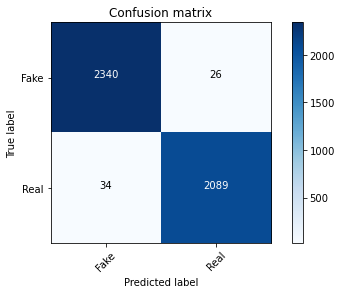

In [59]:
# Confusion Matrix
cm_lr = metrics.confusion_matrix(y_test, prediction_lr)
plot_confusion_matrix(cm_lr, classes=['Fake', 'Real'])

In [120]:
# Creating classification report 
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2366
           1       0.99      0.98      0.99      2123

    accuracy                           0.99      4489
   macro avg       0.99      0.99      0.99      4489
weighted avg       0.99      0.99      0.99      4489



### 4.b. Decision Tree Classifier

In [76]:
# Vectorizing and applying TF-IDF
pipe_dt = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=0))])
# Fitting the model
model_dt = pipe_dt.fit(X_train, y_train)

# Accuracy
prediction_dt = model_dt.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_dt)*100,2)))

Accuracy: 95.79%


Confusion matrix, without normalization


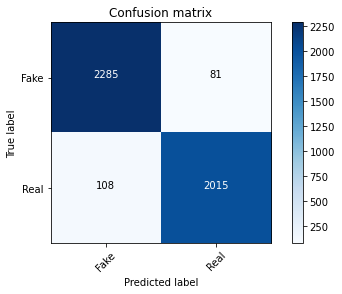

In [77]:
# Confusion Matrix
cm_dt = metrics.confusion_matrix(y_test, prediction_dt)
plot_confusion_matrix(cm_dt, classes=['Fake', 'Real'])

In [119]:
# Creating classification report 
print(classification_report(y_test,prediction_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2366
           1       0.96      0.95      0.96      2123

    accuracy                           0.96      4489
   macro avg       0.96      0.96      0.96      4489
weighted avg       0.96      0.96      0.96      4489



### 4.c Random Forest Classifier

In [63]:
# Vectorizing and applying TF-IDF
pipe_rf = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model_rf = pipe_rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_rf)*100,2)))

Accuracy: 98.6%


Confusion matrix, without normalization


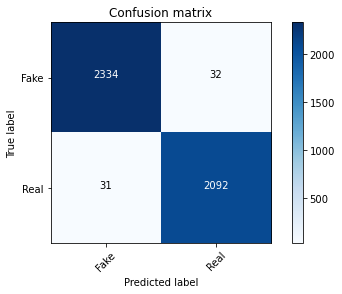

In [64]:
# Confusion Matrix
cm_rf = metrics.confusion_matrix(y_test, prediction_rf)
plot_confusion_matrix(cm_rf, classes=['Fake', 'Real'])

In [118]:
# Creating classification report 
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2366
           1       0.98      0.99      0.99      2123

    accuracy                           0.99      4489
   macro avg       0.99      0.99      0.99      4489
weighted avg       0.99      0.99      0.99      4489



### 4.d. Naive Bayes

In [70]:
# Vectorizing and applying TF-IDF
pipe_nb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB(alpha=0.1))])

model_nb = pipe_nb.fit(X_train, y_train)
prediction_nb = model_nb.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_nb)*100,2)))

Accuracy: 93.92%


Confusion matrix, without normalization


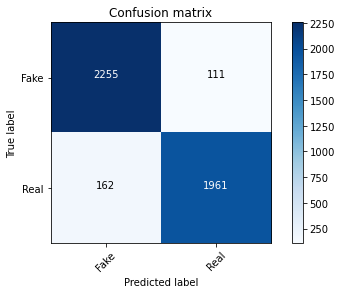

In [71]:
# Confusion Matrix
cm_nb = metrics.confusion_matrix(y_test, prediction_nb)
plot_confusion_matrix(cm_nb, classes=['Fake', 'Real'])

In [117]:
# Creating classification report 
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2366
           1       0.95      0.92      0.93      2123

    accuracy                           0.94      4489
   macro avg       0.94      0.94      0.94      4489
weighted avg       0.94      0.94      0.94      4489



### 4.e. KNN


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# Vectorizing and applying TF-IDF
pipe_knn = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors=3))])

model_knn = pipe_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_knn)*100,2)))

Accuracy: 69.12%


Confusion matrix, without normalization


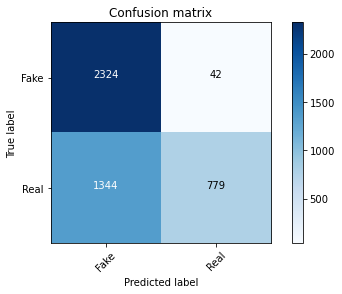

In [115]:
# Confusion Matrix
cm_knn = metrics.confusion_matrix(y_test, prediction_knn)
plot_confusion_matrix(cm_knn, classes=['Fake', 'Real'])

In [116]:
# Creating classification report 
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      2366
           1       0.95      0.37      0.53      2123

    accuracy                           0.69      4489
   macro avg       0.79      0.67      0.65      4489
weighted avg       0.78      0.69      0.66      4489



Based on our above exercise from 4.a to 4.e, we compared out results and found that logistic regression is giving the best accuracy for text classification, so we will further tune the model by hyperparamterizing it. Below is the summary:

Recall      =     percentage of the actual fake news are classified as fake news

Presion    =     percentage of the classified fake news are actually fake news

<img src = "modeling_summary.jpg" style = "width:1000px">

### 4.f. Hyperparamter tuning for Logistic Regression

In [223]:
## Initialize a pipline to start with
pipe_transformer = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer())])

In [224]:
# Logistic Regression with Hyperparameter Tuning
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}

cv_lm = GridSearchCV(LogisticRegression(random_state=0), 
                   param_grid,
                   cv=10,
                   verbose=0)

X_train_transformed = pipe_transformer['tfidf'].fit_transform(pipe_transformer['vect'].fit_transform(X_train))

cv_lm.fit(X_train_transformed,
        y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963623...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [225]:
# Pick the best tuning parameter lambda and the penalty term
cv_lm.best_params_

{'C': 494.1713361323828, 'penalty': 'l2'}

In [226]:
# Vectorizing and applying TF-IDF
pipe_lr_ht = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression(C=cv_lm.best_params_['C'], 
                                              penalty= cv_lm.best_params_['penalty']))])

# Fitting the model
model_lr_ht = pipe_lr_ht.fit(X_train, y_train)

# Accuracy
prediction_lr_ht = model_lr_ht.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction_lr_ht)*100,2)))

Accuracy: 99.29%


## 5. Evaluating model results for the best selection

Confusion matrix, without normalization


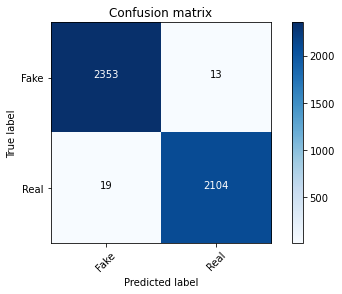

In [298]:
# Confusion Matrix
cm_lr = metrics.confusion_matrix(y_test, prediction_lr_ht)
plot_confusion_matrix(cm_lr, classes=['Fake', 'Real'])

In [299]:
# Creating classification report 
print(classification_report(y_test,prediction_lr_ht))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2366
           1       0.99      0.99      0.99      2123

    accuracy                           0.99      4489
   macro avg       0.99      0.99      0.99      4489
weighted avg       0.99      0.99      0.99      4489



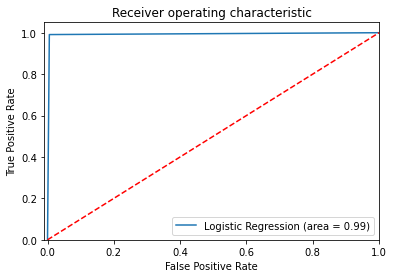

In [300]:
# AUC Curve for regularized logistic regression
logit_roc_auc = roc_auc_score(y_test, prediction_lr_ht)
fpr, tpr, thresholds = roc_curve(y_test, prediction_lr_ht)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# <span style='color:Blue'> Part G : Miscellaneous - Twitter Analysis </span>

Not part of our project presentation or report but since we as a team wanted to learn how to work with real time data using APIs we finished it but didn't run modeling on this. As discussed with Prof. Deng, we are keeping it as a placeholder just to add credibility to our commitment in the proposal doc.

<img src = "twitter.jpeg" style = "width:1000px">

In [130]:
!pip install twitter

### 1. Set up the Twitter API

In [53]:
import twitter

# These keys are from Twitter's developer account created for this project. Please don't share it with anyone!
CONSUMER_KEY = '3jmA1BqasLHfItBXj3KnAIGFB'
CONSUMER_SECRET = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'
OAUTH_TOKEN = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
OAUTH_TOKEN_SECRET = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

### 2. Identify top trends for world v/s resepctive region (in our case US)

In [54]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# NOTE:
# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': '#MUNPSG', 'url': 'http://twitter.com/search?q=%23MUNPSG', 'promoted_content': None, 'query': '%23MUNPSG', 'tweet_volume': 35223}, {'name': 'Neymar', 'url': 'http://twitter.com/search?q=Neymar', 'promoted_content': None, 'query': 'Neymar', 'tweet_volume': 52544}, {'name': '#NamgiHot100Songwriters', 'url': 'http://twitter.com/search?q=%23NamgiHot100Songwriters', 'promoted_content': None, 'query': '%23NamgiHot100Songwriters', 'tweet_volume': 33597}, {'name': 'Paredes', 'url': 'http://twitter.com/search?q=Paredes', 'promoted_content': None, 'query': 'Paredes', 'tweet_volume': 26522}, {'name': 'Rashford', 'url': 'http://twitter.com/search?q=Rashford', 'promoted_content': None, 'query': 'Rashford', 'tweet_volume': 30844}, {'name': 'McTominay', 'url': 'http://twitter.com/search?q=McTominay', 'promoted_content': None, 'query': 'McTominay', 'tweet_volume': 11734}, {'name': 'Spotify', 'url': 'http://twitter.com/search?q=Spotify', 'promoted_content': None, 'query': 'Spotify

In [55]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#MUNPSG
Neymar
#NamgiHot100Songwriters
Paredes
Rashford
McTominay
Spotify
#koşarAKgideceksiniz
Lavar Ball
Giroud
Steelers
Braithwaite
#HereWeGo
Griezmann
Pulisic
#QuaranteamBTS
İrfan Can
Dembele
Leipzig
Get Fred
Mbappe
Big Ben
LeBron
Gelo
Apple Music
Candace
WALLS BY LOUIS TOMLINSON
Sevilla
How is Fred
Kratos
Bronny
Take Fred
Aubrey Huff
Harry Styles
راشفورد
Varchester United
نيمار
Defund the Police
Wednesday Afternoon Football
LOUIS IS SUCCESSFUL
McRib
Sörloth
RGIII
Havertz
Rothen
Başakşehir
McSauce
Old Trafford
10 Kasım
Busquets


In [56]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

Lavar
#HereWeGo
#hellokittyxcolourpop
#BALvsPIT
Spotify
Neymar
#CORPSEISVERIFIED
Gelo
#NamgiHot100Songwriters
Big Ben
Aubrey Huff
LeBron
Rashford
Wednesday Afternoon Football
Apple Music
Defund the Police
RGIII
McRib
Lin Wood
Rafer Johnson
Candace Owens
PS5 Pro
Paredes
Giroud
Katie Porter
Sunday Night Football
Harry Styles
TOMMYS
Trump Vaccine
Kratos
Pulisic
Braithwaite
Pat Patterson
Dembele
bruce hornsby
Mike White
Walter Williams
Britney
Rep. Porter
Kawhi
Senator Kelly
Griezmann
jonah marais
Mo Brooks
All 3 Ball
Lou Holtz
Tyus Bowser
Pouncey
Pro God
Benny Snell


In [57]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Spotify', 'Big Ben', 'Pulisic', '#NamgiHot100Songwriters', 'Griezmann', 'Gelo', 'Wednesday Afternoon Football', 'RGIII', 'Rashford', 'Paredes', 'McRib', 'Giroud', 'Harry Styles', 'Braithwaite', 'LeBron', 'Kratos', 'Dembele', 'Aubrey Huff', 'Neymar', 'Apple Music', 'Defund the Police', '#HereWeGo'}


### 3. Anatomy of a tweet

In [58]:
import json

# Set this variable to a trending topic, 
q = '#Defund the Police' 

count = 1000

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Showing one sample search result
print(json.dumps(statuses[0], indent=1))

Length of statuses 84
Length of statuses 84
{
 "created_at": "Wed Dec 02 20:41:43 +0000 2020",
 "id": 1334236325717786624,
 "id_str": "1334236325717786624",
 "text": "@JamesSurowiecki What, exactly, are you recommending?\n\nThat Ds strongly attack #defund , to convince voters they ha\u2026 https://t.co/CCtlw18FUX",
 "truncated": true,
 "entities": {
  "hashtags": [
   {
    "text": "defund",
    "indices": [
     79,
     86
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "JamesSurowiecki",
    "name": "James Surowiecki",
    "id": 1219579814,
    "id_str": "1219579814",
    "indices": [
     0,
     16
    ]
   }
  ],
  "urls": [
   {
    "url": "https://t.co/CCtlw18FUX",
    "expanded_url": "https://twitter.com/i/web/status/1334236325717786624",
    "display_url": "twitter.com/i/web/status/1\u2026",
    "indices": [
     117,
     140
    ]
   }
  ]
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"https:

In [59]:
# Check twitter KPIs for 10 tweets like favourites, retweets, etc.

for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


@JamesSurowiecki What, exactly, are you recommending?

That Ds strongly attack #defund , to convince voters they ha… https://t.co/CCtlw18FUX
Favorites:  0
Retweets:  0

#defund the police? Ever see a social worker take down a meth addict? It's not possible. You are going to set a soc… https://t.co/ggdIsHgmp9
Favorites:  0
Retweets:  0

@JamaalBowmanNY It’s almost like you new Senators have the brain capacity of a spoiled child. Obama is talking abou… https://t.co/RqMqPhrfJ5
Favorites:  1
Retweets:  0

RT @coco_mariel20: Some of y’all acting confused but the dictionary is clear. #Defund 

Defund the police the way education, public health…
Favorites:  0
Retweets:  11

@thehill From the prez who literally militarized the police with pentagon surplus, Byrne grants with no oversight,… https://t.co/tFqtP8vt0N
Favorites:  0
Retweets:  0

So.  @sunny on @theview #theview.  #defund the police doesn't mean re envision the police.  #PBO is right, it's a s… https://t.co/oojkAzIDjc
Favorites:  3


### 4. Extracting handle info and tweets summary

In [60]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "@JamesSurowiecki What, exactly, are you recommending?\n\nThat Ds strongly attack #defund , to convince voters they ha\u2026 https://t.co/CCtlw18FUX",
 "#defund the police? Ever see a social worker take down a meth addict? It's not possible. You are going to set a soc\u2026 https://t.co/ggdIsHgmp9",
 "@JamaalBowmanNY It\u2019s almost like you new Senators have the brain capacity of a spoiled child. Obama is talking abou\u2026 https://t.co/RqMqPhrfJ5",
 "RT @coco_mariel20: Some of y\u2019all acting confused but the dictionary is clear. #Defund \n\nDefund the police the way education, public health\u2026",
 "@thehill From the prez who literally militarized the police with pentagon surplus, Byrne grants with no oversight,\u2026 https://t.co/tFqtP8vt0N"
]
[
 "JamesSurowiecki",
 "JamaalBowmanNY",
 "coco_mariel20",
 "thehill",
 "sunny"
]
[
 "defund",
 "defund",
 "Defund",
 "theview",
 "defund"
]
[
 "@JamesSurowiecki",
 "What,",
 "exactly,",
 "are",
 "you"
]


In [61]:
# Frequency distribution from the words in tweets

from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('the', 107), ('to', 41), ('RT', 34), ('that', 32), ('police', 26), ('is', 25), ('money', 24), ('of', 20), ('#defund', 19), ('#Defund', 18)]

[('CPA_Bakes', 11), ('coco_mariel20', 10), ('Jerry_Ratcliffe', 5), ('Junkie4Wrestlin', 3), ('sh4keer', 3), ('NickIsRadford', 3), ('DavidBrace2', 3), ('thehill', 2), ('Booker4KY', 2), ('IlhanMN', 2)]

[('Defund', 20), ('defund', 19), ('DEFUND', 6), ('Minneapolis', 6), ('Police', 4), ('Instagram', 3), ('Obama', 2), ('DeFund', 2), ('DeGun', 2), ('POLICE', 2)]



In [62]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------+-------+
| Word    | Count |
+---------+-------+
| the     |   107 |
| to      |    41 |
| RT      |    34 |
| that    |    32 |
| police  |    26 |
| is      |    25 |
| money   |    24 |
| of      |    20 |
| #defund |    19 |
| #Defund |    18 |
+---------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| CPA_Bakes       |    11 |
| coco_mariel20   |    10 |
| Jerry_Ratcliffe |     5 |
| Junkie4Wrestlin |     3 |
| sh4keer         |     3 |
| NickIsRadford   |     3 |
| DavidBrace2     |     3 |
| thehill         |     2 |
| Booker4KY       |     2 |
| IlhanMN         |     2 |
+-----------------+-------+
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| Defund      |    20 |
| defund      |    19 |
| DEFUND      |     6 |
| Minneapolis |     6 |
| Police      |     4 |
| Instagram   |     3 |
| Obama       |     2 |
| DeFund      |     2 |
| DeGun       |     2 |
| POLICE      |     2 |
+-------------+-

In [63]:
# A function for computing lexical diversity

def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3894802755165936
0.5340909090909091
0.4563106796116505
19.011904761904763


In [66]:
# Most Popular tweets

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+---------------+---------------------+----------------------------------------------------+
| Count | Screen Name   | Tweet ID            | Text                                               |
+-------+---------------+---------------------+----------------------------------------------------+
| 11    | coco_mariel20 | 1334169759856939022 | RT @coco_mariel20: Some of y’all acting confused   |
|       |               |                     | but the dictionary is clear. #Defund               |
|       |               |                     |                                                    |
|       |               |                     | Defund the police the way education, public        |
|       |               |                     | health…                                            |
| 11    | coco_mariel20 | 1334169759856939022 | RT @coco_mariel20: Some of y’all acting confused   |
|       |               |                     | but the dictionary is clear. #Defund       

In [67]:
# Looking up users who have retweeted a status

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


Text(0.5, 0, 'Word Rank')

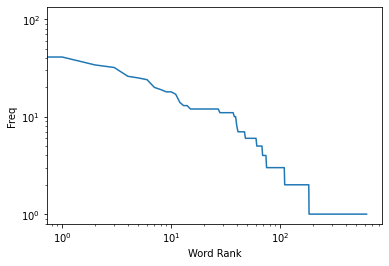

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

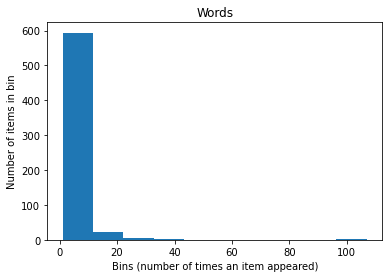

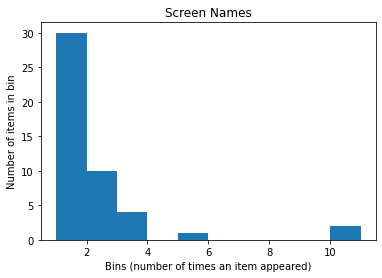

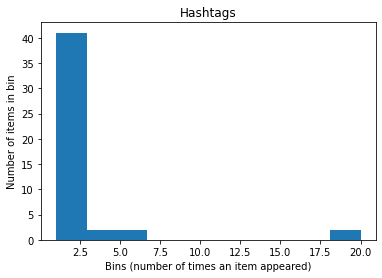

<Figure size 432x288 with 0 Axes>

In [69]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

### 5. Sentimental Analysis

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [72]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [73]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [74]:
analyzer = SentimentIntensityAnalyzer()

In [75]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [76]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [78]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.894 : "Win a VIP Staycation at @wallcentre valued at $3000 in @DailyHiveVan’s annual #DH12Days https://t.co/LcqaNj3zGT Fol… https://t.co/Tb33qeCsDH"


In [79]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.784 : "@Cernovich You think? The whole country is lost of Trump loses. dumb to vote for Commies and their allies, even if they are GOP"
